<a href="https://colab.research.google.com/github/indiecannoli/aspire-proj-2023/blob/main/Twitter_analysis_Taylor_Swift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tweets from before, during, and after Taylor Swift released Reputation, her  2017 "comeback" album to rebrand herself

My guess on general sentiment before analyzing the tweets
*   Taylor Swift is hated before the album but then loved after
*   Kanye West is loved before the album but then hated after



## Imports

In [ ]:
pip install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-6nu3dzpi
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-6nu3dzpi
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit b76f485208016f337ce36a3c6c0c6573502693a7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev32+gb76f485-py3-none-any.whl size=73275 sha256=82c51551b738e404a01a1372740a50a593de96864bffbec9ea24347cea6684cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-1tw_662y/wheels/05/e9/f7/57056e7c7e44b1feed932fa49fdec9d706c4f563e37160ab74
Successfully built snscrape


In [ ]:
!pip install bertopic[visualization] --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 49.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.6 MB/s eta 0:00:00


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from copy import deepcopy
from bertopic import BERTopic
import json
from google.colab import files

## Seth's code

In [ ]:
import json
from google.colab import files

In [ ]:
# four months before first song in reputation released
with open('tweets_before.json', 'w') as jsonfile:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Taylor Swift taylor swift since:2017-04-01 until:2017-08-01').get_items()):
        if i>3:
            break
        jsonfile.write(tweet.json())#json.dump(tweet, jsonfile)
        jsonfile.write('\r\n')

In [ ]:
files.download('tweets_before.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
tweets_before = files.upload()
tweets_before = list(tweets_before.values()).pop().decode('utf-8').strip().split("\r\n")
tweets_before

In [ ]:
before_container = []
for line_raw in tweets_before:
    tweet = json.loads(line_raw)
    before_container.append([tweet['user']['username'], tweet['date'], tweet['likeCount'], tweet['sourceLabel'], tweet['content']])

In [ ]:
before_container 

^^^ end seth's code

## JSON -> df

before, during, and after

Four months before the first song in reputation is released: "Look what you made me do"

In [ ]:
# four months before first song in reputation released
with open('tweets_before.json', 'w') as jsonfile:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Taylor Swift taylor swift since:2017-04-01 until:2017-08-01').get_items()):
        if i>10000:
            break
        jsonfile.write(tweet.json())#json.dump(tweet, jsonfile)
        jsonfile.write('\r\n')

In [ ]:
files.download('tweets_before.json')

In [ ]:
tweets_before = files.upload()
tweets_before = list(tweets_before.values()).pop().decode('utf-8').strip().split("\r\n")

Saving tweets_before.json to tweets_before.json


In [ ]:
before_container = []
for line_raw in tweets_before:
    tweet = json.loads(line_raw)
    before_container.append([tweet['user']['username'],  tweet['date'], tweet['lang'], tweet['likeCount'], tweet['sourceLabel'], tweet['content']])

In [ ]:
before_df = pd.DataFrame(before_container, columns=["User", "Date Created", "Lang", "Number of Likes", "Source of Tweet", "Tweet"])

3 months after the release of first song and capturing nov (release of full album)

In [ ]:
# three months after first song in reputation released
with open('tweets_during.json', 'w') as jsonfile:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Taylor Swift since:2017-09-01 until:2017-12-01').get_items()):
        if i>10000:
            break
        jsonfile.write(tweet.json())
        jsonfile.write('\r\n')

In [ ]:
files.download('tweets_during.json')

In [ ]:
tweets_during = files.upload()
tweets_during = list(tweets_during.values()).pop().decode('utf-8').strip().split("\r\n")

Saving tweets_during.json to tweets_during.json


In [ ]:
during_container = []
for line_raw in tweets_during:
    tweet = json.loads(line_raw)
    during_container.append([tweet['user']['username'],  tweet['date'], tweet['lang'], tweet['likeCount'], tweet['sourceLabel'], tweet['content']])

In [ ]:
during_df = pd.DataFrame(during_container, columns=["User", "Date Created", "Lang", "Number of Likes", "Source of Tweet", "Tweet"])
during_df

,User,Date Created,Lang,Number of Likes,Source of Tweet,Tweet
0,Princess_Yuna77,2017-11-30T23:59:54+00:00,en,0,None,I liked a @YouTube video https://t.co/gkXMIlOr...
1,dylanlaf15,2017-11-30T23:59:45+00:00,en,0,None,I liked a @YouTube video https://t.co/fmxQ6ZJJ...
2,sfswift13,2017-11-30T23:59:43+00:00,en,0,None,I see Taylor Swift in 2 days!!!!!! @taylornati...
3,dylanlaf15,2017-11-30T23:59:29+00:00,en,0,None,I liked a @YouTube video https://t.co/sBZtrSJK...
4,clownandi,2017-11-30T23:59:21+00:00,en,3,None,@cm_blackwood @shabong @SANDRA_AUSTON @RoyTroy...
...,...,...,...,...,...,...
9996,p1nkpixie,2017-11-29T09:21:03+00:00,en,0,None,After seven years I'm finally seeing Taylor Sw...
9997,briholme,2017-11-29T09:20:57+00:00,en,1,None,TAYLOR SWIFT TICKETS SO STRESSFUL BUT BEST BE ...
9998,CharlieJMckie,2017-11-29T09:20:56+00:00,en,1,None,OMG I GOT PRESALE TICKETS TO SEE TAYLOR I’M BA...
9999,GraceDoylee,2017-11-29T09:20:31+00:00,en,0,None,"After waiting 10 years to see Taylor Swift, I ..."


4 months after full release of album

In [ ]:
# four months after whole album is released
with open('tweets_after.json', 'w') as jsonfile:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Taylor Swift since:2017-12-02 until:2018-3-01').get_items()):
        if i>10000:
            break
        jsonfile.write(tweet.json())
        jsonfile.write('\r\n')

In [ ]:
files.download('tweets_after.json')

In [ ]:
tweets_after = files.upload()
tweets_after = list(tweets_after.values()).pop().decode('utf-8').strip().split("\r\n")

Saving tweets_after.json to tweets_after.json


In [ ]:
after_container = []
for line_raw in tweets_after:
    tweet = json.loads(line_raw)
    after_container.append([tweet['user']['username'],  tweet['date'], tweet['lang'], tweet['likeCount'], tweet['sourceLabel'], tweet['content']])

In [ ]:
after_df = pd.DataFrame(after_container, columns=["User", "Date Created", "Lang", "Number of Likes", "Source of Tweet", "Tweet"])

Checking

In [ ]:
before_df
during_df
after_df

## Cleaning data frames

In [ ]:
# remove languages that are not english
# tried for loop originally but didn't work
before_df = before_df[(before_df.Lang == 'en')]
during_df = during_df[(during_df.Lang == 'en')]
after_df = after_df[(after_df.Lang == 'en')]

In [ ]:
import re

df_list = [before_df, during_df, after_df]

before_df = before_df.replace('\n','', regex=True)
before_df['Tweet']=before_df['Tweet'].str.replace('(\@\w+.*?)',"")
before_df['Tweet'] = before_df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

during_df = during_df.replace('\n','', regex=True)
during_df['Tweet']=during_df['Tweet'].str.replace('(\@\w+.*?)',"")
during_df['Tweet'] = during_df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

after_df = after_df.replace('\n','', regex=True)
after_df['Tweet']=after_df['Tweet'].str.replace('(\@\w+.*?)',"")
after_df['Tweet'] = after_df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

## BERT Topic Modeling

Stop words

In [ ]:
before_posts = before_df.Tweet.values.tolist()
during_posts = during_df.Tweet.values.tolist()
after_posts = after_df.Tweet.values.tolist()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
print(stopwords.words('english'))
from nltk.tokenize import word_tokenize

for i in range(0, len(before_posts)):
  text_tokens = word_tokenize(before_posts[i])
  tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
  before_posts[i] = ' '.join(tokens_without_sw)

for i in range(0, len(during_posts)):
  text_tokens = word_tokenize(during_posts[i])
  tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
  during_posts[i] = ' '.join(tokens_without_sw)

for i in range(0, len(after_posts)):
  text_tokens = word_tokenize(after_posts[i])
  tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
  after_posts[i] = ' '.join(tokens_without_sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Topic Modeling

before

In [ ]:
before_model = BERTopic(language="english", nr_topics=15)
topics, probs = before_model.fit_transform(before_posts)

In [ ]:
before_model.get_topic(7)

[('vegas', 0.3120666764698349),
 ('enter', 0.28533964968107445),
 ('retweet', 0.28533964968107445),
 ('really', 0.2674857226884299),
 ('win', 0.2628488719226091),
 ('trip', 0.2548280795398159),
 ('follow', 0.24501769757702394),
 ('like', 0.20313532320039984),
 ('real', 0.20095161715933632),
 ('free', 0.18814969574902685)]

In [ ]:
before_model.visualize_topics(title= '<b>Before</b>')
# title= '<b>Before</b>'

during

In [ ]:
during_model = BERTopic(language="english", nr_topics=15)
topics, probs = during_model.fit_transform(during_posts)

In [ ]:
during_model.visualize_topics(title= '<b>During</b>')

In [ ]:
during_model.get_topic(2)

[('joe', 0.24538002591306748),
 ('alwyn', 0.2405956667642268),
 ('relationship', 0.12451686924064394),
 ('private', 0.12257673940479433),
 ('keeps', 0.10139120711515091),
 ('how', 0.1010704277635624),
 ('with', 0.10029485346728134),
 ('her', 0.07315844679445908),
 ('living', 0.07021553014348599),
 ('reportedly', 0.06680091808971224)]

after

In [ ]:
after_model = BERTopic(language="english", nr_topics=15)
topics, probs = after_model.fit_transform(after_posts)

In [ ]:
after_model.visualize_topics(title = "<b>After<b>")

In [ ]:
after_model.get_topic(2)

[('lipa', 0.24052019488218346),
 ('dua', 0.23816940216589497),
 ('threats', 0.20481514965949413),
 ('death', 0.20197542415947098),
 ('fans', 0.16257565011095293),
 ('received', 0.16076749899823595),
 ('reveals', 0.12921709022807037),
 ('she', 0.12554744034088552),
 ('from', 0.12110966691331845),
 ('kanye', 0.12091473036247982)]

### Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

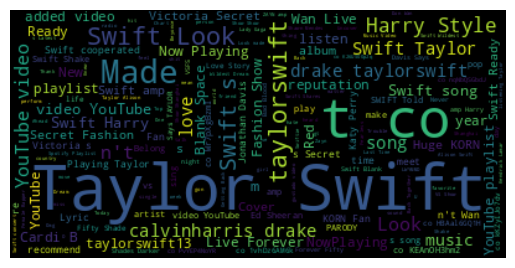

In [ ]:
# Start with one review:
text = " ".join(tweet for tweet in before_posts)

# update stopwords
stopwords = set(STOPWORDS)
stopwords.update(["https", "t co"])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.9 MB/s eta 0:00:00


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
test_df = before_df.head(6)

rate = SentimentIntensityAnalyzer()
sentiment_dict = rate.polarity_scores(test_df.Tweet[5])
sentiment_dict

{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.4019}

In [ ]:
test_df = before_df.head(6)
rate = SentimentIntensityAnalyzer()

test_rates = pd.DataFrame()
for elem in (test_df.Tweet):
  sentiment_dict = rate.polarity_scores(elem)
  test_rates = test_rates.append(sentiment_dict,ignore_index=True)

In [ ]:
test_rates

In [ ]:
rate = SentimentIntensityAnalyzer()

before_rates = pd.DataFrame()
during_rates = pd.DataFrame()
after_rates = pd.DataFrame()

for tweet in (before_df.Tweet):
  sentiment_dict = rate.polarity_scores(tweet)
  before_rates = before_rates.append(sentiment_dict,ignore_index=True)

for tweet in (during_df.Tweet):
  sentiment_dict = rate.polarity_scores(tweet)
  during_rates = during_rates.append(sentiment_dict,ignore_index=True)

for tweet in (after_df.Tweet):
  sentiment_dict = rate.polarity_scores(tweet)
  after_rates = during_rates.append(sentiment_dict,ignore_index=True)

In [ ]:
before_rates.mean()

neg         0.050471
neu         0.688596
pos         0.258624
compound    0.285648
dtype: float64

In [ ]:
during_rates.mean()

neg         0.046856
neu         0.738878
pos         0.212236
compound    0.263694
dtype: float64

In [ ]:
after_rates.mean()

neg         0.046887
neu         0.738849
pos         0.212234
compound    0.263596
dtype: float64